# Propriétés d'une population fictive de 130 personnes: analyse univariée qualitative

Version du 24 avril 2022

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

observations_mod = pd.read_csv(path)
observations_mod.set_index('id', inplace=True)
observations_mod.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
## Nombre de lignes et de colonnes du tableau
observations_mod.shape

(130, 5)

In [4]:
### Nombre de lignes du tableau
obs = observations_mod
#obs = observations # 900
len(obs)

130

## Regrouper et analyser les variables qualitatives

### Parti politique

In [5]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
droite        18
gauche        23
centre        25
populiste     30
écologiste    34
dtype: int64

In [6]:
### Modification du dataframe
df_partis = pd.DataFrame(sgb_parti, columns=['effectif'])
df_partis.reset_index(inplace=True)
df_partis

,parti,effectif
0,droite,18
1,gauche,23
2,centre,25
3,populiste,30
4,écologiste,34


In [9]:
### Le code attribué manuellement permet de représenter l'émicycle parlementaire lors du tri
# En revanche, noter que la valeur n'a pas de signification quantitative
df_partis['code_parti'] = [4,2,3,5,1]
df_partis

,parti,effectif,code_parti
0,droite,18,4
1,gauche,23,2
2,centre,25,3
3,populiste,30,5
4,écologiste,34,1


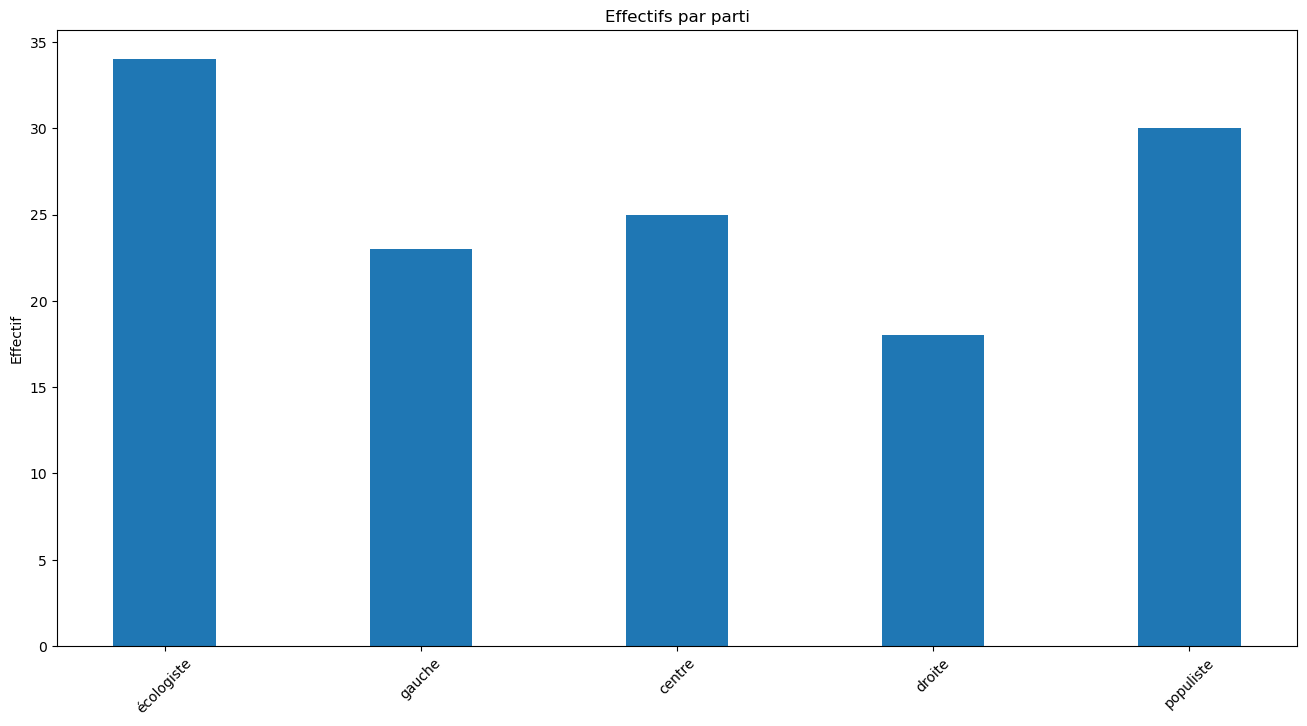

In [10]:
# Distribution par parti: représentation par diagramme à barres

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Fréquence de lecture d'un journal

In [11]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = False)
sgb_lecture_journal

lecture_journal
trois-quatre fois par semaine    35
très rarement                    30
le week-end                      29
tous les jours                   19
de temps en temps                17
dtype: int64

In [12]:
## Le code permet un tri dans l'ordre de la fréquence de cette variable 
#  qui en fait est une variable qualitative ordonnée
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [4,1,3,5,2]
df_lecture_journal

,lecture,effectif,code_lecture
0,trois-quatre fois par semaine,35,4
1,très rarement,30,1
2,le week-end,29,3
3,tous les jours,19,5
4,de temps en temps,17,2


In [13]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
list(df_lecture_journal['lecture'])

['très rarement',
 'de temps en temps',
 'le week-end',
 'trois-quatre fois par semaine',
 'tous les jours']

In [14]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
1,très rarement,30,1,30
4,de temps en temps,17,2,47
2,le week-end,29,3,76
0,trois-quatre fois par semaine,35,4,111
3,tous les jours,19,5,130


In [15]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
1,très rarement,30,1,30,23.08
4,de temps en temps,17,2,47,13.08
2,le week-end,29,3,76,22.31
0,trois-quatre fois par semaine,35,4,111,26.92
3,tous les jours,19,5,130,14.62


In [16]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
1,très rarement,30,1,30,23.08,23.08
4,de temps en temps,17,2,47,13.08,36.15
2,le week-end,29,3,76,22.31,58.46
0,trois-quatre fois par semaine,35,4,111,26.92,85.38
3,tous les jours,19,5,130,14.62,100.00


In [17]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
1,très rarement,30,1,30,23.08,23.08
4,de temps en temps,17,2,47,13.08,36.15
2,le week-end,29,3,76,22.31,58.46
0,trois-quatre fois par semaine,35,4,111,26.92,85.38
3,tous les jours,19,5,130,14.62,100.00


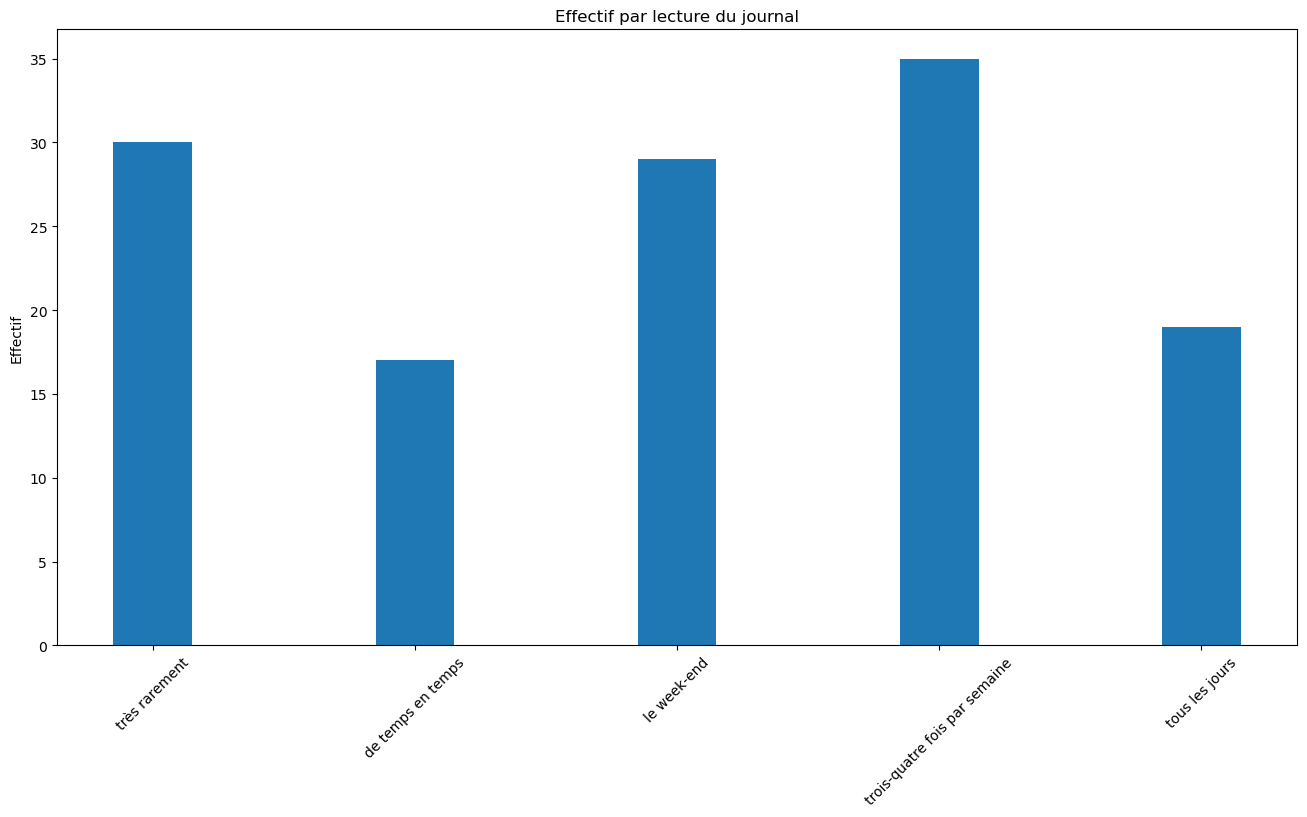

In [18]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


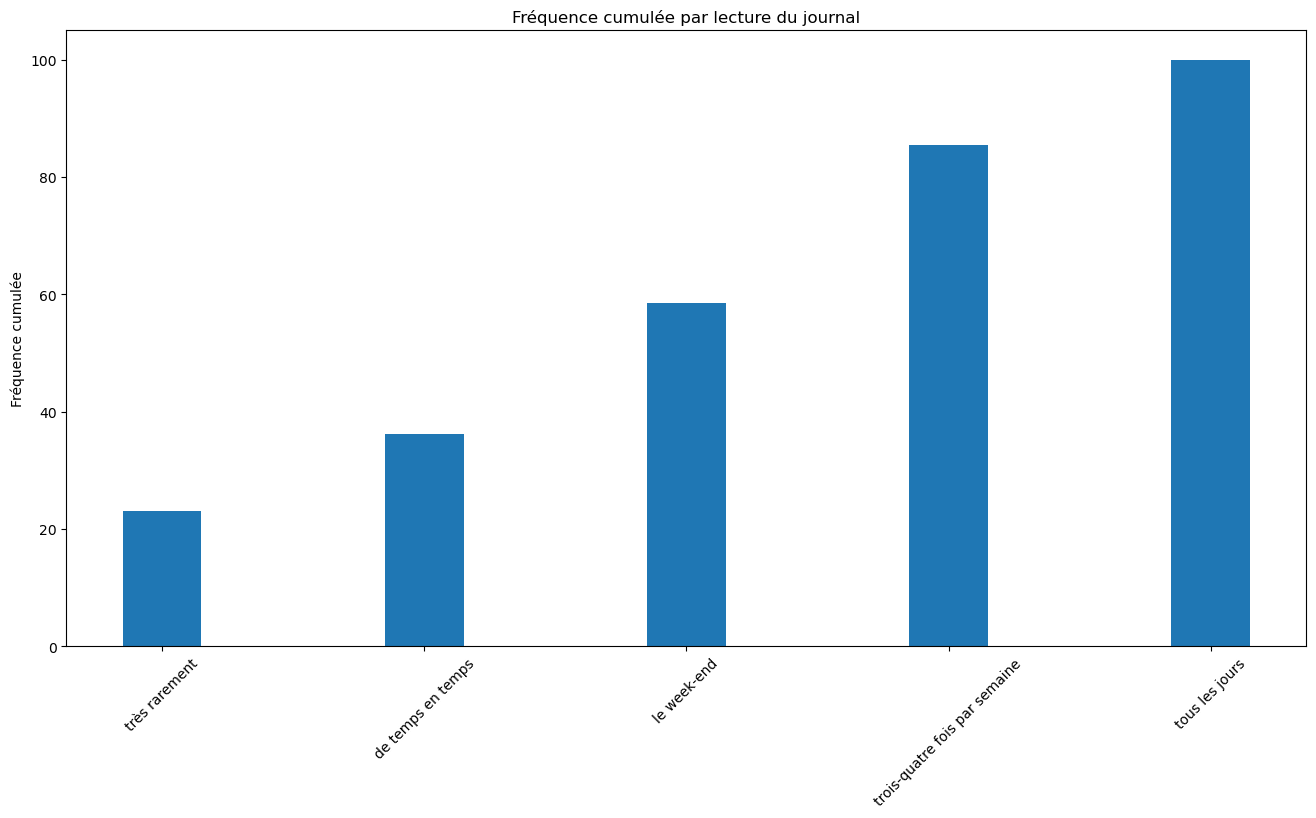

In [19]:
# Distribution par lecture journal: fréquence cumulée

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


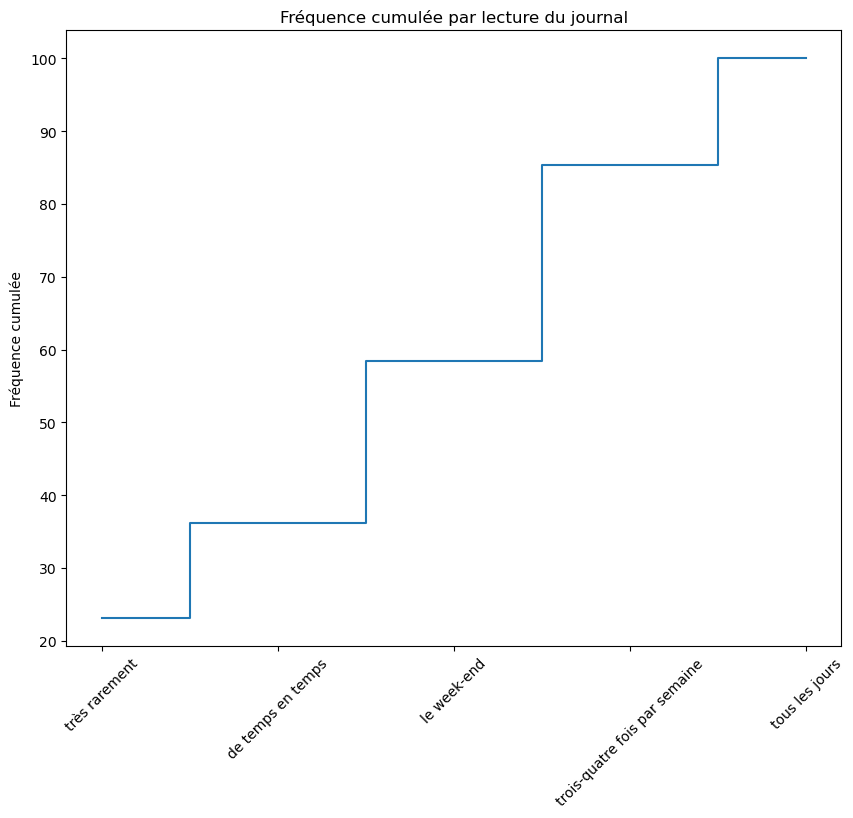

In [20]:
### Distribution par lecture journal: fréquence cumulée
# Diagramme par paliers plus lisible

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid') # autre valeur: steps-post, steps

plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(10, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [21]:
###  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
obs['lecture_journal_codes'] = obs['lecture_journal']\
    .replace(['très rarement','de temps en temps','le week-end','trois-quatre fois par semaine','tous les jours'],[1,2,3,4,5])
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,lecture_journal_codes
id,,,,,,
1,44,3,de temps en temps,droite,9660,2
2,45,1,tous les jours,droite,7364,5
3,54,3,de temps en temps,droite,8947,2
4,86,2,tous les jours,populiste,6317,5
5,77,2,tous les jours,gauche,6511,5


(1.0, 5.0)

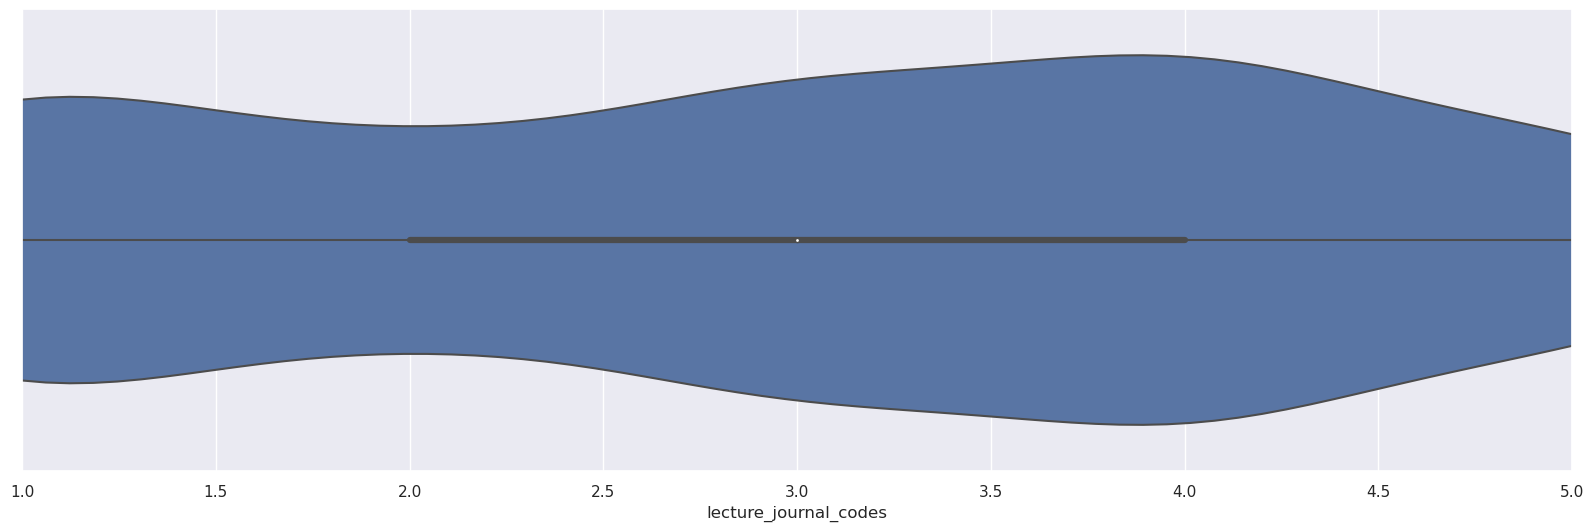

In [22]:
### Ce violin plot n'a pas beaucoup de sens et en doit pas être utilisé ! 
#  car les densitées des points intermédiaires (qui n'existent pas) sont trompeuses
# Adapté pour les variables continues, le violin plot ne l'est pas pour les 
# variables ordonnées comme dans le cas présent

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 6)})

l = obs["lecture_journal_codes"]

ax = sns.violinplot(x=l)
ax.set_xlim(left=min(l), right=max(l))

